**Dogs vs Cats Image Classification With Image Augmentation**

 [Totorial](https://github.com/Azure/azure-content/blob/master/contributor-guide/contributor-guide-index.md).

In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

Para construir nuestro clasificador de imágenes, comenzamos descargando el conjunto de datos. El conjunto de datos que estamos usando es una versión filtrada del conjunto de datos de Perros vs. Gatos de Kaggle (en última instancia, este conjunto de datos lo proporciona Microsoft Research).
Usaremos la clase tf.keras.preprocessing.image.ImageDataGenerator que leerá los datos del disco. Por lo tanto, necesitamos descargar directamente Dogs vs. Cats desde una URL y descomprimirlo en el sistema de archivos.

In [3]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

zip_dir = tf.keras.utils.get_file('cats_and_dogs_filterted.zip', origin=_URL, extract=True)

Ahora asignaremos variables con la ruta de archivo adecuada para los conjuntos de entrenamiento y validación.

In [4]:
base_dir = os.path.join(os.path.dirname(zip_dir), 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

In [5]:
train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures

**Entendiendo nuestros datos**

Veamos cuántas imágenes de perros y gatos tenemos en nuestro directorio de entrenamiento y validación.

In [6]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [7]:
print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


**Configuración de los parámetros del modelo**

Para mayor comodidad, permítanos configurar variables que se utilizarán más adelante mientras preprocesamos nuestro conjunto de datos y entrenamos nuestra red.

In [8]:
BATCH_SIZE = 100
IMG_SHAPE  = 150 # Our training data consists of images with width of 150 pixels and height of 150 pixels

Después de definir nuestros generadores para las imágenes de entrenamiento y validación, el método flow_from_directory cargará imágenes desde el disco y aplicará el cambio de escala y las redimensionará a las dimensiones requeridas usando una sola línea de código.

**Data Augmentation**

El sobreajuste (Overfittig) ocurre a menudo cuando tenemos una pequeña cantidad de ejemplos de entrenamiento. Una forma de solucionar este problema es aumentar nuestro conjunto de datos para que tenga suficiente cantidad y variedad de ejemplos de entrenamiento. El aumento de datos adopta el enfoque de generar más datos de entrenamiento a partir de muestras de entrenamiento existentes, aumentando las muestras a través de transformaciones aleatorias que producen imágenes de apariencia creíble. El objetivo es que en el momento del entrenamiento, tu modelo nunca vea exactamente la misma imagen dos veces. Esto expone el modelo a más aspectos de los datos, lo que le permite generalizar mejor.

En tf.keras podemos implementar esto usando la misma clase ImageDataGenerator que usamos antes. Simplemente podemos pasar diferentes transformaciones que desearíamos a nuestro conjunto de datos como una forma de argumentos y se encargará de aplicarlo al conjunto de datos durante nuestro proceso de entrenamiento.

Para empezar, definamos una función que pueda mostrar una imagen, para que podamos ver el tipo de aumento que se ha realizado. Luego, veremos los aumentos específicos que usaremos durante el entrenamiento.

In [9]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

**Flipping the image horizontally**

Podemos comenzar aplicando aleatoriamente el aumento de volteo horizontal a nuestro conjunto de datos y ver cómo se verán las imágenes individuales después de la transformación. Esto se logra pasando horizontal_flip = True como argumento a la clase ImageDataGenerator.

In [10]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_SHAPE,IMG_SHAPE))

Found 2000 images belonging to 2 classes.


Para ver la transformación en acción, tomemos una imagen de muestra de nuestro conjunto de entrenamiento y la repitamos cinco veces. El aumento se aplicará aleatoriamente (o no) a cada repetición.

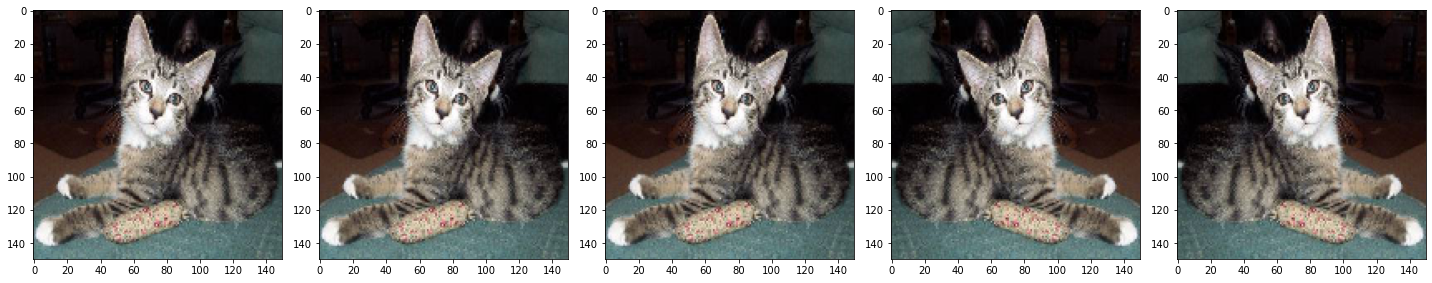

In [11]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

**Rotating the image**

El aumento de rotación rotará aleatoriamente la imagen hasta un número específico de grados. Aquí, lo configuraremos en 45.

In [12]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_SHAPE, IMG_SHAPE))

Found 2000 images belonging to 2 classes.


To see the transformation in action, let's once again take a sample image from our training set and repeat it. The augmentation will be randomly applied (or not) to each repetition.

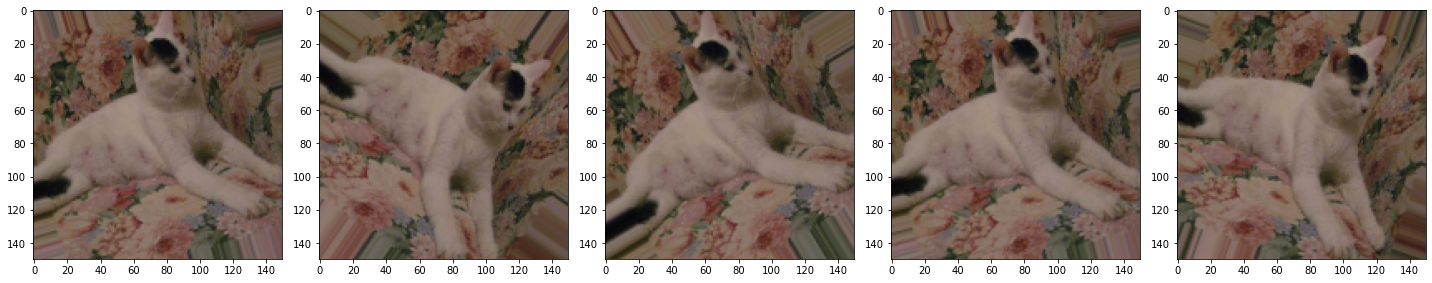

In [13]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

**Applying Zoom**

También podemos aplicar el aumento de zoom a nuestro conjunto de datos, haciendo zoom en las imágenes hasta en un 50% de forma aleatoria.

In [14]:
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_SHAPE, IMG_SHAPE))

Found 2000 images belonging to 2 classes.


Una vez más, tome una imagen de muestra de nuestro conjunto de entrenamiento y repítala. El aumento se aplicará aleatoriamente (o no) a cada repetición.

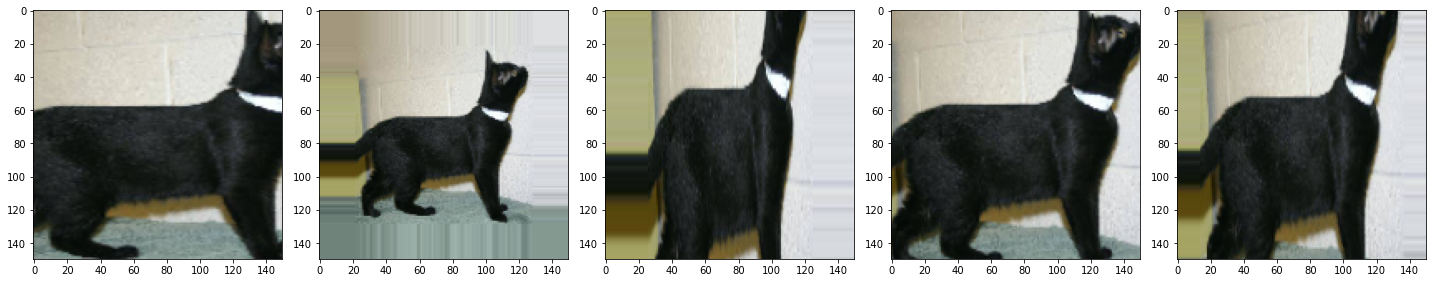

In [15]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

**Poniendolo todo junto**

Podemos aplicar todos estos aumentos, e incluso otros, con solo una línea de código, pasando los aumentos como argumentos con los valores adecuados.

Aquí, hemos aplicado cambio de escala, rotación de 45 grados, cambio de ancho, cambio de altura, giro horizontal y aumento de zoom a nuestras imágenes de entrenamiento.

In [16]:
image_gen_train = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_data_gen = image_gen_train.flow_from_directory(batch_size=BATCH_SIZE,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_SHAPE,IMG_SHAPE),
                                                     class_mode='binary')

Found 2000 images belonging to 2 classes.


Visualicemos cómo se vería una sola imagen cinco veces diferentes, cuando pasamos estos aumentos al azar a nuestro conjunto de datos.

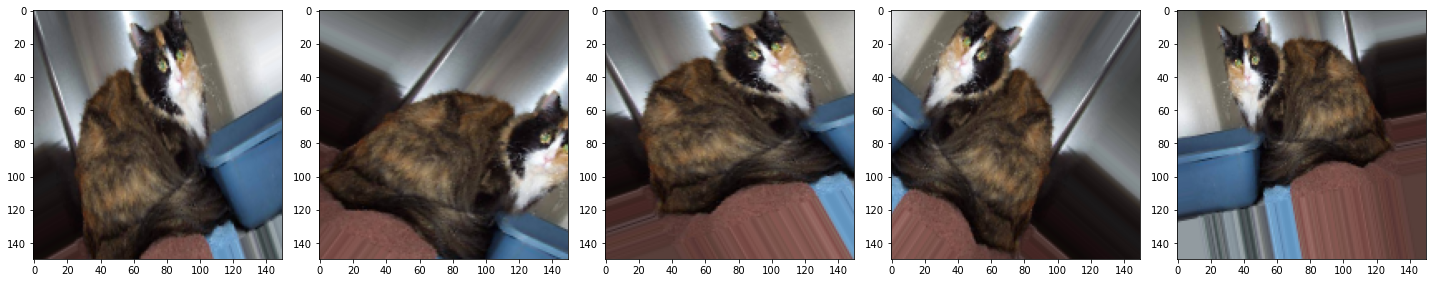

In [17]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

**Creating Validation Data generator**

Generalmente, solo aplicamos el aumento de datos a nuestros ejemplos de entrenamiento, ya que las imágenes originales deben ser representativas de lo que nuestro modelo necesita administrar. Entonces, en este caso, solo estamos reescalando nuestras imágenes de validación y convirtiéndolas en lotes usando ImageDataGenerator.

In [18]:
image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=BATCH_SIZE,
                                                 directory=validation_dir,
                                                 target_size=(IMG_SHAPE, IMG_SHAPE),
                                                 class_mode='binary')

Found 1000 images belonging to 2 classes.


**Model Creation**

**Define the model**

El modelo consta de cuatro bloques de convolución con una capa de grupo máxima en cada uno de ellos.

Antes de las capas densas finales, también aplicamos una probabilidad de abandono de 0,5. Significa que el 50% de los valores que ingresan a la capa Dropout se establecerán en cero. Esto ayuda a prevenir el sobreajuste.

Luego tenemos una capa completamente conectada con 512 unidades, con una función de activación relu. El modelo generará probabilidades de clase para dos clases, perros y gatos, utilizando softmax.

In [19]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2)
])

**Compiling the model**

Como de costumbre, usaremos el optimizador de Adam. Dado que generamos una categorización softmax, usaremos sparse_categorical_crossentropy como la función de pérdida. También nos gustaría observar la precisión del entrenamiento y la validación en cada época a medida que entrenamos nuestra red, por lo que estamos pasando el argumento de las métricas.

In [20]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

**Model Summary**

Veamos todas las capas de nuestra red usando el método de resumen.

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

**Train the model**

Es hora de que entrenemos a nuestra red.

Dado que nuestros lotes provienen de un generador (ImageDataGenerator), usaremos fit_generator en lugar de fit.

In [22]:
epochs=10
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_val / float(BATCH_SIZE)))
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
20/20 [==============================] - 70s 3s/step - loss: 0.7113 - accuracy: 0.5180 - val_loss: 0.6890 - val_accuracy: 0.5010
Epoch 2/10
20/20 [==============================] - 58s 3s/step - loss: 0.6869 - accuracy: 0.5385 - val_loss: 0.6691 - val_accuracy: 0.5450
Epoch 3/10
20/20 [==============================] - 60s 3s/step - loss: 0.6771 - accuracy: 0.5575 - val_loss: 0.6894 - val_accuracy: 0.5400
Epoch 4/10
20/20 [==============================] - 60s 3s/step - loss: 0.6667 - accuracy: 0.5985 - val_loss: 0.6451 - val_accuracy: 0.5980
Epoch 5/10
20/20 [==============================] - 65s 3s/step - loss: 0.6427 - accuracy: 0.6305 - val_loss: 0.6308 - val_accuracy: 0.6260
Epoch 6/10
20/20 [==============================] - 61s 3s/step - loss: 0.6300 - accuracy: 0.6520 - val_loss: 0.6210 - val_accuracy: 0.6600
Epoch 7/10
20/20 [==============================] - 60s 3s/step - loss: 0.6202 - acc

**Visualización de los resultados del entrenamiento**

Ahora visualizaremos los resultados que obtenemos después de entrenar a nuestra red.

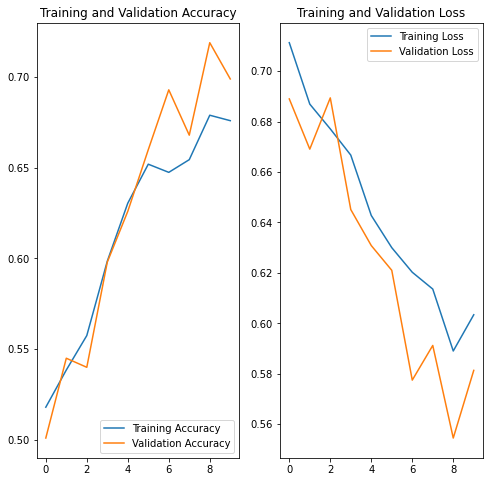

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()